In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [15]:
student_grades = [['Bob', 68, 33], ['Cindy', 83, 88], ['Martin', 33, 45], ['Dre', 73, 83], ['Daniel', 10, 62], ['Margaret', 67, 21], ['Corey', 23, 44], ['Flip', 92, 95]]

In [34]:
names = []
test_scores = []
homework_scores = []

for grade in student_grades:
    names.append(grade[0])
    test_scores.append(grade[1])
    homework_scores.append(grade[2])

In [16]:
final_grades = [['Bob', 50.5], ['Cindy', 85.5], ['Martin', 39], ['Dre', 78], ['Daniel', 36], ['Margaret', 44], ['Corey', 33.5], ['Flip', 93.5]]

In [62]:
final_scores = []

for grade in final_grades:
    
    final_scores.append(grade[1])

In [217]:
# We first look at a regression model, meaning we estimate a sepcific value.
# Here, we'll estimate the final grade percentage given scores of tests

x_vals = np.array(test_scores).reshape(-1, 1)
y_vals = np.array(final_scores)

# Create regression object

reg = linear_model.LinearRegression()

# Train the model using the training sets

reg.fit(x_vals, y_vals)

display('Intercept', reg.intercept_)
display('Slope', reg.coef_[0])

'Intercept'

18.608241094588436

'Slope'

0.6929489337267094

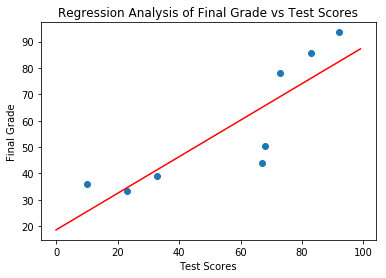

In [161]:
fig = plt.figure()
axes = plt.subplot()

dummy = np.arange(100)

plt.scatter(x_vals, y_vals)
axes.plot(dummy, reg.coef_ * dummy + reg.intercept_, c='red')

plt.xlabel("Test Scores")
plt.ylabel("Final Grade")
plt.title("Regression Analysis of Final Grade vs Test Scores")
plt.show()

In [125]:
# Now let's look at classifcation

pass_fail = []
for score in final_scores:
    if score > 55:
        pass_fail.append(True)
    else:
        pass_fail.append(False)

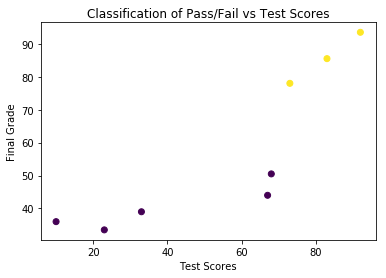

In [168]:
plt.scatter(x_vals, y_vals, c=pass_fail)
plt.title("Classification of Pass/Fail vs Test Scores")
plt.xlabel("Test Scores")
plt.ylabel("Final Grade")
plt.show()

In [129]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_vals, pass_fail)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [200]:
display(tree_model.predict(x_vals))
display(pass_fail)

array([False,  True, False,  True, False, False, False,  True])

[False, True, False, True, False, False, False, True]

In [ ]:
# Obviously it did a good job learning the training data.  Ideally, we'd need to test this against new data
# that our algorithm hasn't yet seen to see if it's a good predictor or not.

In [143]:
# To work with more complicated data, we'll have to use some more technology that will greatly simplify
# our work.  This includes pandas (a generalized dictionary) and seaborn (a convenient plotting package).

import pandas as pd
import seaborn as sns

In [145]:
# We'll view our first real dataset : The Iris Dataset.  We load it from UCI's machine learning repository
# and populate it into a new object--the Pandas dataframe.

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [146]:
# We can use the .head(#) method on a dataframe to view the first # of rows (defaults to 5):

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [147]:
# Pandas obviously makes our job easy, convenient, and makes our outputs nice.  We can easily explore the data
# in a variety of ways.  First, we look at basic statistical information with the .describe() attribute:

dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [150]:
# We see that we have 150 data points with 4 different independent variables or "features."
# Let's take a moment to play around with pandas to be able to use our data

# In a Pandas Dataframe, the data is organized by columns (at the top), which are like dictionary keys, and
# index, which defaults to an integer starting from 0.  Let's learn how to access a specific column or index:

# To get all values in a column, we specify the column via brackets (behaves with normal slicing)
# Notice it returns the index with the value...let's look at the first 5 values only:

dataset['sepal-length'].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal-length, dtype: float64

In [241]:
# To turn this column of values into something we know how to use, a np.array, all we need to do is tack on the
# .values() method:

sep_length = dataset['sepal-length'].values

In [159]:
# To instead select an INTEGER index, we can use the .loc attribute.  If our index has names other than integers,
# we can look up that labeled index row with .iloc[] instead:

dataset.loc[2]

sepal-length            4.7
sepal-width             3.2
petal-length            1.3
petal-width             0.2
class           Iris-setosa
Name: 2, dtype: object

In [ ]:
# Let's not worry much about pandas anymore since we know how to convert the values into np.arrays.  I may continue with
# some convenient pandas code, but note that you can now proceed with plotting and visualization using the numpy arrays
# that you're accustomed to.

In [172]:
# We note that, for this problem, we're interested in predicting how to cluster the data points into
# 3 distinct classes: 

dataset['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [196]:
# Let's see how many there are of each class to see if our data is balanced:

Number_for_class = []

for variant in dataset['class'].unique():
    Number_for_class.append((variant, dataset['class'][dataset['class'] == variant].count()))
    
Number_for_class

[('Iris-setosa', 50), ('Iris-versicolor', 50), ('Iris-virginica', 50)]

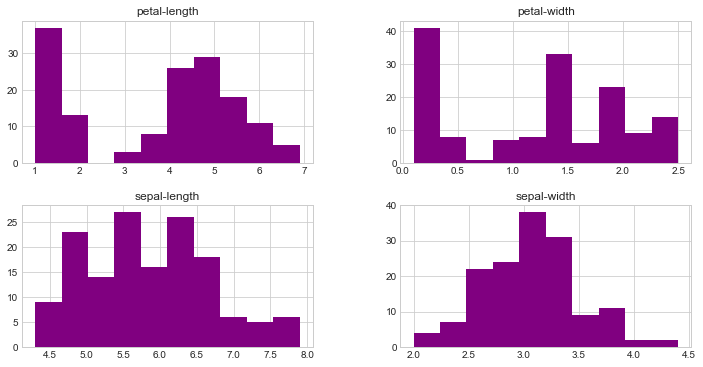

In [240]:
# Now that we've seen some numbers, let's try to visualize them.  We can start by looking at the distributions
# of the 4 different independent variables that were measured.

dataset.hist(color='purple')
his = plt.gcf()
his.set_size_inches(12, 6)
plt.show()

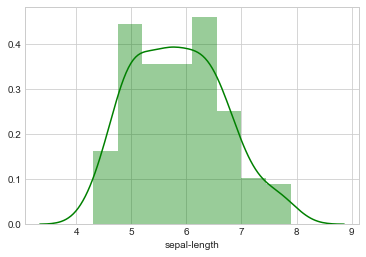

In [238]:
# Since there's not much data, the distributions are not very smooth (far from central limit theorem), but it's
# helpful to know how to generate a probability distribution function (PDF) alongside your histogram in case
# you ever need it:

sns.distplot(dataset['sepal-length'], color='green')
plt.show()

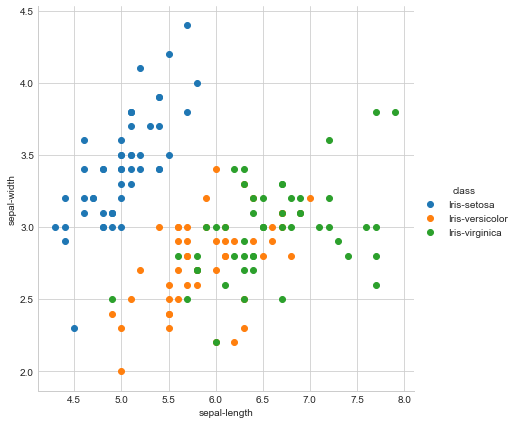

In [229]:
# Using seaborn and pandas, we can create a pretty nice scatter plot graphic to help us visualize the problem.

sns.set_style('whitegrid')
sns.FacetGrid(dataset, hue = 'class', size = 6)\
.map(plt.scatter, 'sepal-length', 'sepal-width')\
.add_legend()
plt.show()

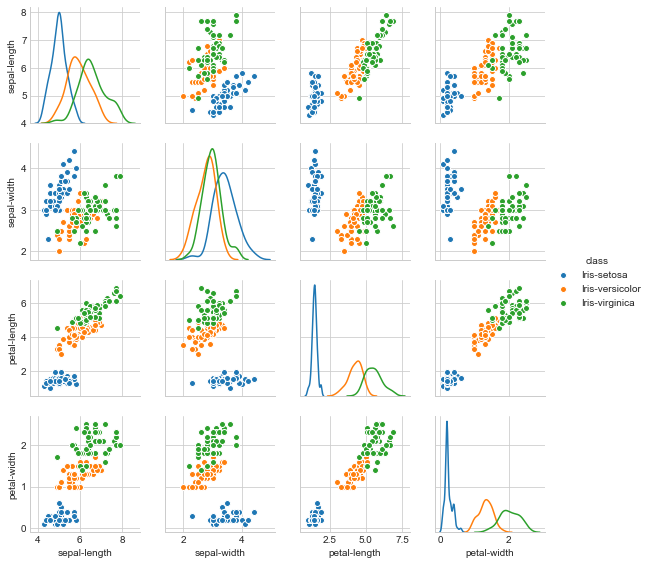

In [230]:
# With seaborn, we can make a scatter plot of all different pairs of variables.  Notes that a plot of a variable
# against itself simply gives the marginalized distribution of that variable instead.

sns.pairplot(dataset, hue = 'class', size = 2, diag_kind = 'kde')
plt.show()

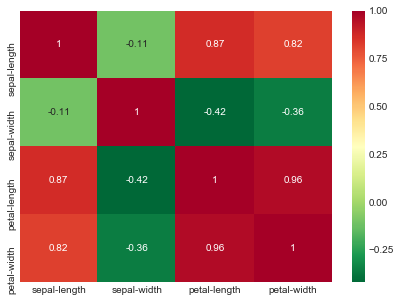

In [232]:
# We notice some clustering and correlation already...we can try to visualize this more explicitly with the seaborn heatmap

plt.figure(figsize=(7,5)) 
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn_r') 
plt.show()

In [ ]:
# What do these correlated variables mean?  How can we choose which variables to use in our machine learning algorithm?
# Next time, we will learn how to use methods from machine learning to answer these questsions and build a
# complete model.